In [1]:
from IPython.display import Image, display_jpeg, display_pdf, display_png
import sys
import ipywidgets
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from matplotlib.patches import Rectangle
import numpy as np

import random
import math

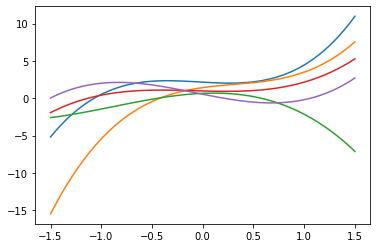

In [2]:
dim_data = 3
np.random.seed(seed=32)
#coefficient = np.random.rand(dim_data+1)
#predicted functionをpredict_y[x]に格納
xmin_predicted = -1.5
xmax_predicted = +1.5

for j in range(5):
    new_expectation_vector = np.random.uniform(-3, 3, dim_data+1)

    predict_x = np.linspace(xmin_predicted, xmax_predicted, 100)
    predict_y = np.zeros(100)
    for j in range(0,100):
        for i in range(0,dim_data+1):
            predict_y[j] = predict_y[j] + new_expectation_vector[i]*predict_x[j]**i
    plt.plot(predict_x,predict_y,label="predicted y")

In [3]:
new_expectation_vector

array([ 0.53640739, -2.70040344,  0.37075104,  1.59815083])

(-10.0, 10.0)

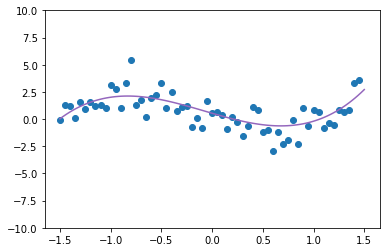

In [4]:
cmap = plt.get_cmap("tab10") 

x_star = np.arange(xmin_predicted, xmax_predicted, 0.05)
y_star = np.zeros(x_star.shape)
for j in range(x_star.shape[0]):
    for i in range(0,dim_data+1):
        y_star[j] = y_star[j] + new_expectation_vector[i]*x_star[j]**i
    
    y_star[j] = np.random.normal(loc=y_star[j],scale=1)
    
plt.plot(predict_x,predict_y,c=cmap(4),label="predicted y")
plt.scatter(x_star,y_star)
plt.ylim(-10, 10)

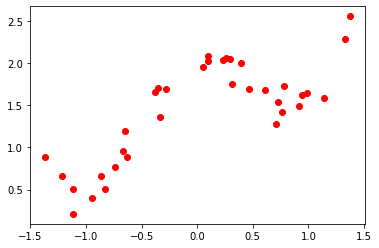

In [5]:
#次元を指定。dim_data次元の正解データをdim_predict次元の関数でfittingする。
dim_data = 4

#正解のdim_data次元関数の係数。dim_data + 1 要素必要。
weights = [2,0.5,-2,0,1] #左から0次,1次,2次,3次,4次


#データ(X,noised_Y)を与えるパラメータ
number_of_data = 35 #データの数
var_of_noise = 0.12 #ノイズの大きさ
xmin = -1.5
xmax = +1.5

#X = np.zeros(number_of_data)
X = np.random.uniform(xmin, xmax, number_of_data)
Y = np.zeros(number_of_data)
Y_noise = np.zeros(number_of_data)

for j in range(number_of_data):
#    X[j] = random.uniform(xmin,xmax)

    for i in range(0,dim_data+1):
        Y[j] = Y[j] + weights[i]*X[j]**i
    
    Y_noise[j] = np.random.normal(loc=Y[j],scale=var_of_noise)
    
plt.scatter(X,Y_noise,c="red",label="predicted y")
#plt.plot(X,Y)


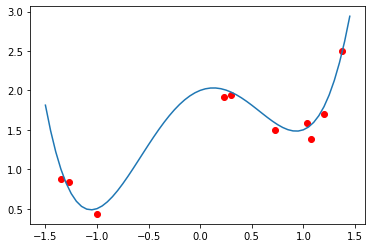

In [10]:
#次元を指定。dim_data次元の正解データをdim_predict次元の関数でfittingする。
dim_data = 4
#正解のdim_data次元関数の係数。dim_data + 1 要素必要。
weights = [2,0.5,-2,0,1] #左から0次,1次,2次,3次,4次


#データ(X,noised_Y)を与えるパラメータ
number_of_data = 10 #データの数
var_of_noise = 0.12 #ノイズの大きさ
xmin = -1.5
xmax = +1.5

#X = np.zeros(number_of_data)
X = np.random.uniform(xmin, xmax, number_of_data)
Y = np.zeros(number_of_data)
Y_noise = np.zeros(number_of_data)

for j in range(number_of_data):
#    X[j] = random.uniform(xmin,xmax)

    for i in range(0,dim_data+1):
        Y[j] = Y[j] + weights[i]*X[j]**i
    
    Y_noise[j] = np.random.normal(loc=Y[j],scale=var_of_noise)
    
X_orig = np.arange(xmin, xmax, 0.05)
Y_orig = np.zeros(X_orig.shape)

for j in range(X_orig.shape[0]):
    for i in range(0,dim_data+1):
        Y_orig[j] = Y_orig[j] + weights[i]*X_orig[j]**i
    
plt.scatter(X,Y_noise,c="red",label="predicted y")
plt.plot(X_orig,Y_orig)
plt.show()

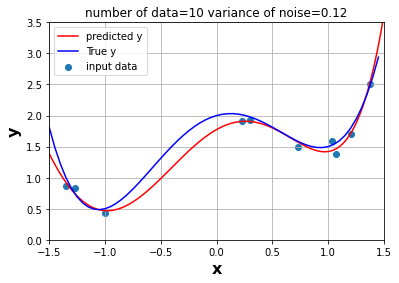

In [15]:
dim_predict = 5

#ベイズ推定のHyper parameters
expectation_vector = np.ones(dim_predict+1)
precision_matrix = np.zeros(dim_predict+1)

#new_precision_matrix,new_expectation_vector= 
#predict(X, Y, dim_predict, dim_data, coefficient, expectation_vector, precision_matrix,number_of_data,variance_of_noise)
#X, Y_noise, weights, number_of_data, var_of_noise

#更新後のパラメータを計算するための準備
input_vec = np.zeros((number_of_data,dim_predict+1))

Sum1 = np.zeros((dim_predict+1,dim_predict+1))
Sum2 = np.c_[np.zeros(dim_predict+1)] #縦ベクトルにしておく

for j in range(0,number_of_data):
    #各xについてinput_vector = (1,x,x^2,x^3,x^4,…)をつくる。
    for i in range(0,dim_predict+1):
        input_vec[j][i] = X[j]**i

    #new_precision_matrix,new_expectation_vectorに必要なSum1とSum2を求める。
    Sum1 = Sum1 + np.dot(input_vec[[j]].transpose(),input_vec[[j]])
    Sum2 = Sum2 + Y_noise[j]*input_vec[[j]].transpose()

#学習後のパラメータ
new_precision_matrix = var_of_noise * Sum1 + precision_matrix
new_expectation_vector = np.dot(np.linalg.inv(new_precision_matrix),(var_of_noise*Sum2 + np.dot(precision_matrix,np.c_[expectation_vector]))) #縦ベクトル

#predicted functionをpredict_y[x]に格納

predict_x = np.linspace(xmin, xmax, 100)
predict_y = np.zeros(100)
for j in range(0,100):
    for i in range(0,dim_predict+1):
        predict_y[j] = predict_y[j] + new_expectation_vector[i]*predict_x[j]**i

#predicted function predict_y[x]と入力データ(X,Y)を同一グラフにプロット
plt.scatter(X,Y_noise,label="input data")
plt.plot(predict_x,predict_y,c="red",label="predicted y")
plt.plot(X_orig,Y_orig,c="blue",label="True y")
plt.legend()
plt.title("number of data="+str(number_of_data)+" variance of noise="+str(var_of_noise))
plt.xlabel("x",fontsize=16,fontweight='bold')
plt.ylabel("y",fontsize=16,fontweight='bold')
plt.xlim([xmin_predicted,xmax_predicted])
plt.ylim([0,3.5])
plt.grid(True)
plt.show()


In [8]:
print(np.diag(new_precision_matrix))
print(new_expectation_vector)

[1.2        0.77322038 0.9235447  1.31488324 2.05948136]
[[ 1.89923263]
 [ 0.51912444]
 [-1.62291853]
 [-0.09897674]
 [ 0.72049363]]
